In [1]:
#importing libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import math as math
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.neural_network import MLPClassifier

In [2]:
#reading excle file
df = pd.read_excel('Mini_protein_data_Ha_for_ml_3_4.xlsx')

In [3]:
df

Category  Category_0_1  Category_3_4  Mono_total_score  Mono_AlaCount  \
0            4             1             1             -2.96           0.15   
1            4             1             1             -3.23           0.17   
2            3             1             0             -3.21           0.15   
3            3             1             0             -3.04           0.10   
4            3             1             0             -3.20           0.12   
...        ...           ...           ...               ...            ...   
1772         3             1             0             -2.53           0.11   
1773         3             1             0             -3.30           0.15   
1774         3             1             0             -2.55           0.11   
1775         3             1             0             -2.97           0.12   
1776         3             1             0             -2.93           0.12   

      Mono_bb  Mono_buried_minus_exposed  Mono_buried_np  \
0       -0.01                      72.47          117.39   
1       -0.01                      72.85          117.21   
2       -0.01                      77.07          118.47   
3       -0.01                      73.75          116.45   
4       -0.01                      75.07          117.40   
...       ...                        ...             ...   
1772    -0.01                      76.13          118.38   
1773    -0.01                      69.11          112.85   
1774    -0.01                      76.22          118.39   
1775    -0.01                      72.87          116.28   
1776    -0.01                      64.65          109.40   

      Mono_buried_over_exposed  Mono_cavity_volume  ...  Core_res_w  \
0                         0.07                0.38  ...           1   
1                         0.07                0.19  ...           1   
2                         0.07                0.17  ...           0   
3                         0.07                0.17  ...           1   
4                         0.07                0.00  ...           1   
...                        ...                 ...  ...         ...   
1772                      0.08                0.14  ...           1   
1773                      0.06                0.11  ...           0   
1774                      0.08                0.19  ...           1   
1775                      0.07                0.09  ...           0   
1776                      0.06                0.00  ...           1   

      Core_res_I  Core_total  Positive_charge_H  Positive_charge_K  \
0              3          11                  2                  4   
1              2           8                  1                  4   
2              3           9                  1                  5   
3              5          14                  1                  1   
4              5          14                  1                  1   
...          ...         ...                ...                ...   
1772           2           8                  1                  2   
1773           3          10                  1                  2   
1774           2           9                  1                  2   
1775           3          10                  2                  2   
1776           3           9                  0                  1   

      Positive_charge_R  Positive_total  Negative_charge_D  Negative_charge_E  \
0                     2               8                  0                  5   
1                     1               6                  0                  4   
2                     0               6                  1                  4   
3                     2               4                  3                  3   
4                     2               4                  3                  3   
...                 ...             ...                ...                ...   
1772                  4               7                  2                 

In [4]:
#Seperating data [Features,Lables]
#tranforming data [Lable encoder and Robust Scaler; Feature selection; PCA Dimentional reduction]
X = df.drop(['Category_0_1','Category_3_4','Category'], axis = 1)
Y = df['Category_3_4']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = RobustScaler().fit_transform(X)    
randomforest = RandomForestClassifier(class_weight='balanced')
randomforest.fit(X,Y)
sfm = SelectFromModel(randomforest, prefit=True) #feature selection using select from 
X = sfm.transform(X)
X.shape

(1777, 55)

In [5]:
#Ploting and Scoring Function
def plot_graphs(trainedalgo, X_Test, Y_Test, Y_hat):
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import plot_precision_recall_curve
    import matplotlib.pyplot as plt
    from sklearn.metrics import plot_confusion_matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(trainedalgo, X_Test, Y_Test,cmap=plt.cm.Blues,normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()
    print(classification_report(Y_Test,Y_hat))
    import scikitplot as skplt
    y_probas_roc = trainedalgo.predict_proba(X_Test)
    roc = skplt.metrics.plot_roc(Y_Test, y_probas_roc,figsize=(45,45),text_fontsize=100,title_fontsize=150)   
    plt.xlabel('False Positive Rate', fontsize=160)
    plt.ylabel('True Positive Rate', fontsize=160)
    for l in roc.lines:
        l.set_lw(25)
    plt.show()
    #Average Precision score
    from sklearn.metrics import average_precision_score
    average_precision_rand = average_precision_score(Y_Test, Y_hat)
    print('Average precision-recall score Random forest: {0:0.2f}'.format(
          average_precision_rand))
    ## Curve for Randdom forrest
    y_probas = trainedalgo.predict_proba(X_Test)
    ax = skplt.metrics.plot_precision_recall(Y_Test, y_probas,figsize=(45,45),text_fontsize=80,title_fontsize=150)
    plt.xlabel('Recall', fontsize=160)
    plt.ylabel('Precision', fontsize=160)
    plt.xticks(fontsize=100)
    plt.yticks(fontsize=100)
    for l in ax.lines:
        l.set_lw(25)
    plt.show()    
    from sklearn.metrics import precision_recall_fscore_support
    precision_recall_fscore_support(Y_Test, Y_hat)

In [6]:
#Data Spliting [Training and Test]
X_train, X_val, y_train, y_val = train_test_split(X, Y, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_val.shape,  y_val.shape)

Train set: (1332, 55) (1332,)
Validation set: (445, 55) (445,)


In [7]:
#KNN Classifier Testing
for k in range (15):
    k = k+1
    #Train Model and Predict  
    neighbour = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    y_predict_KNN = neighbour.predict(X_val)
    print("Test set Accuracy for k = " ,k," : " , accuracy_score(y_val, y_predict_KNN))


Test set Accuracy for k =  1  :  0.6134831460674157
Test set Accuracy for k =  2  :  0.604494382022472
Test set Accuracy for k =  3  :  0.6404494382022472
Test set Accuracy for k =  4  :  0.5955056179775281
Test set Accuracy for k =  5  :  0.6157303370786517
Test set Accuracy for k =  6  :  0.6269662921348315
Test set Accuracy for k =  7  :  0.6449438202247191
Test set Accuracy for k =  8  :  0.6179775280898876
Test set Accuracy for k =  9  :  0.6337078651685393
Test set Accuracy for k =  10  :  0.6179775280898876
Test set Accuracy for k =  11  :  0.6202247191011236
Test set Accuracy for k =  12  :  0.6359550561797753
Test set Accuracy for k =  13  :  0.6269662921348315
Test set Accuracy for k =  14  :  0.6157303370786517
Test set Accuracy for k =  15  :  0.6067415730337079


Test set Accuracy for k 3 =  0.6404494382022472
Confusion matrix, without normalization
[[139  85]
 [ 75 146]]
Normalized confusion matrix
[[0.62053571 0.37946429]
 [0.33936652 0.66063348]]


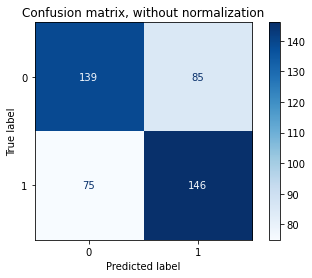

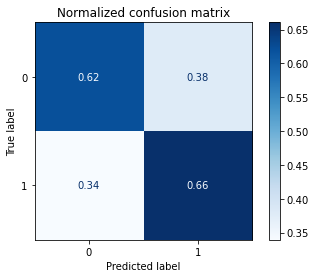

              precision    recall  f1-score   support

           0       0.65      0.62      0.63       224
           1       0.63      0.66      0.65       221

    accuracy                           0.64       445
   macro avg       0.64      0.64      0.64       445
weighted avg       0.64      0.64      0.64       445



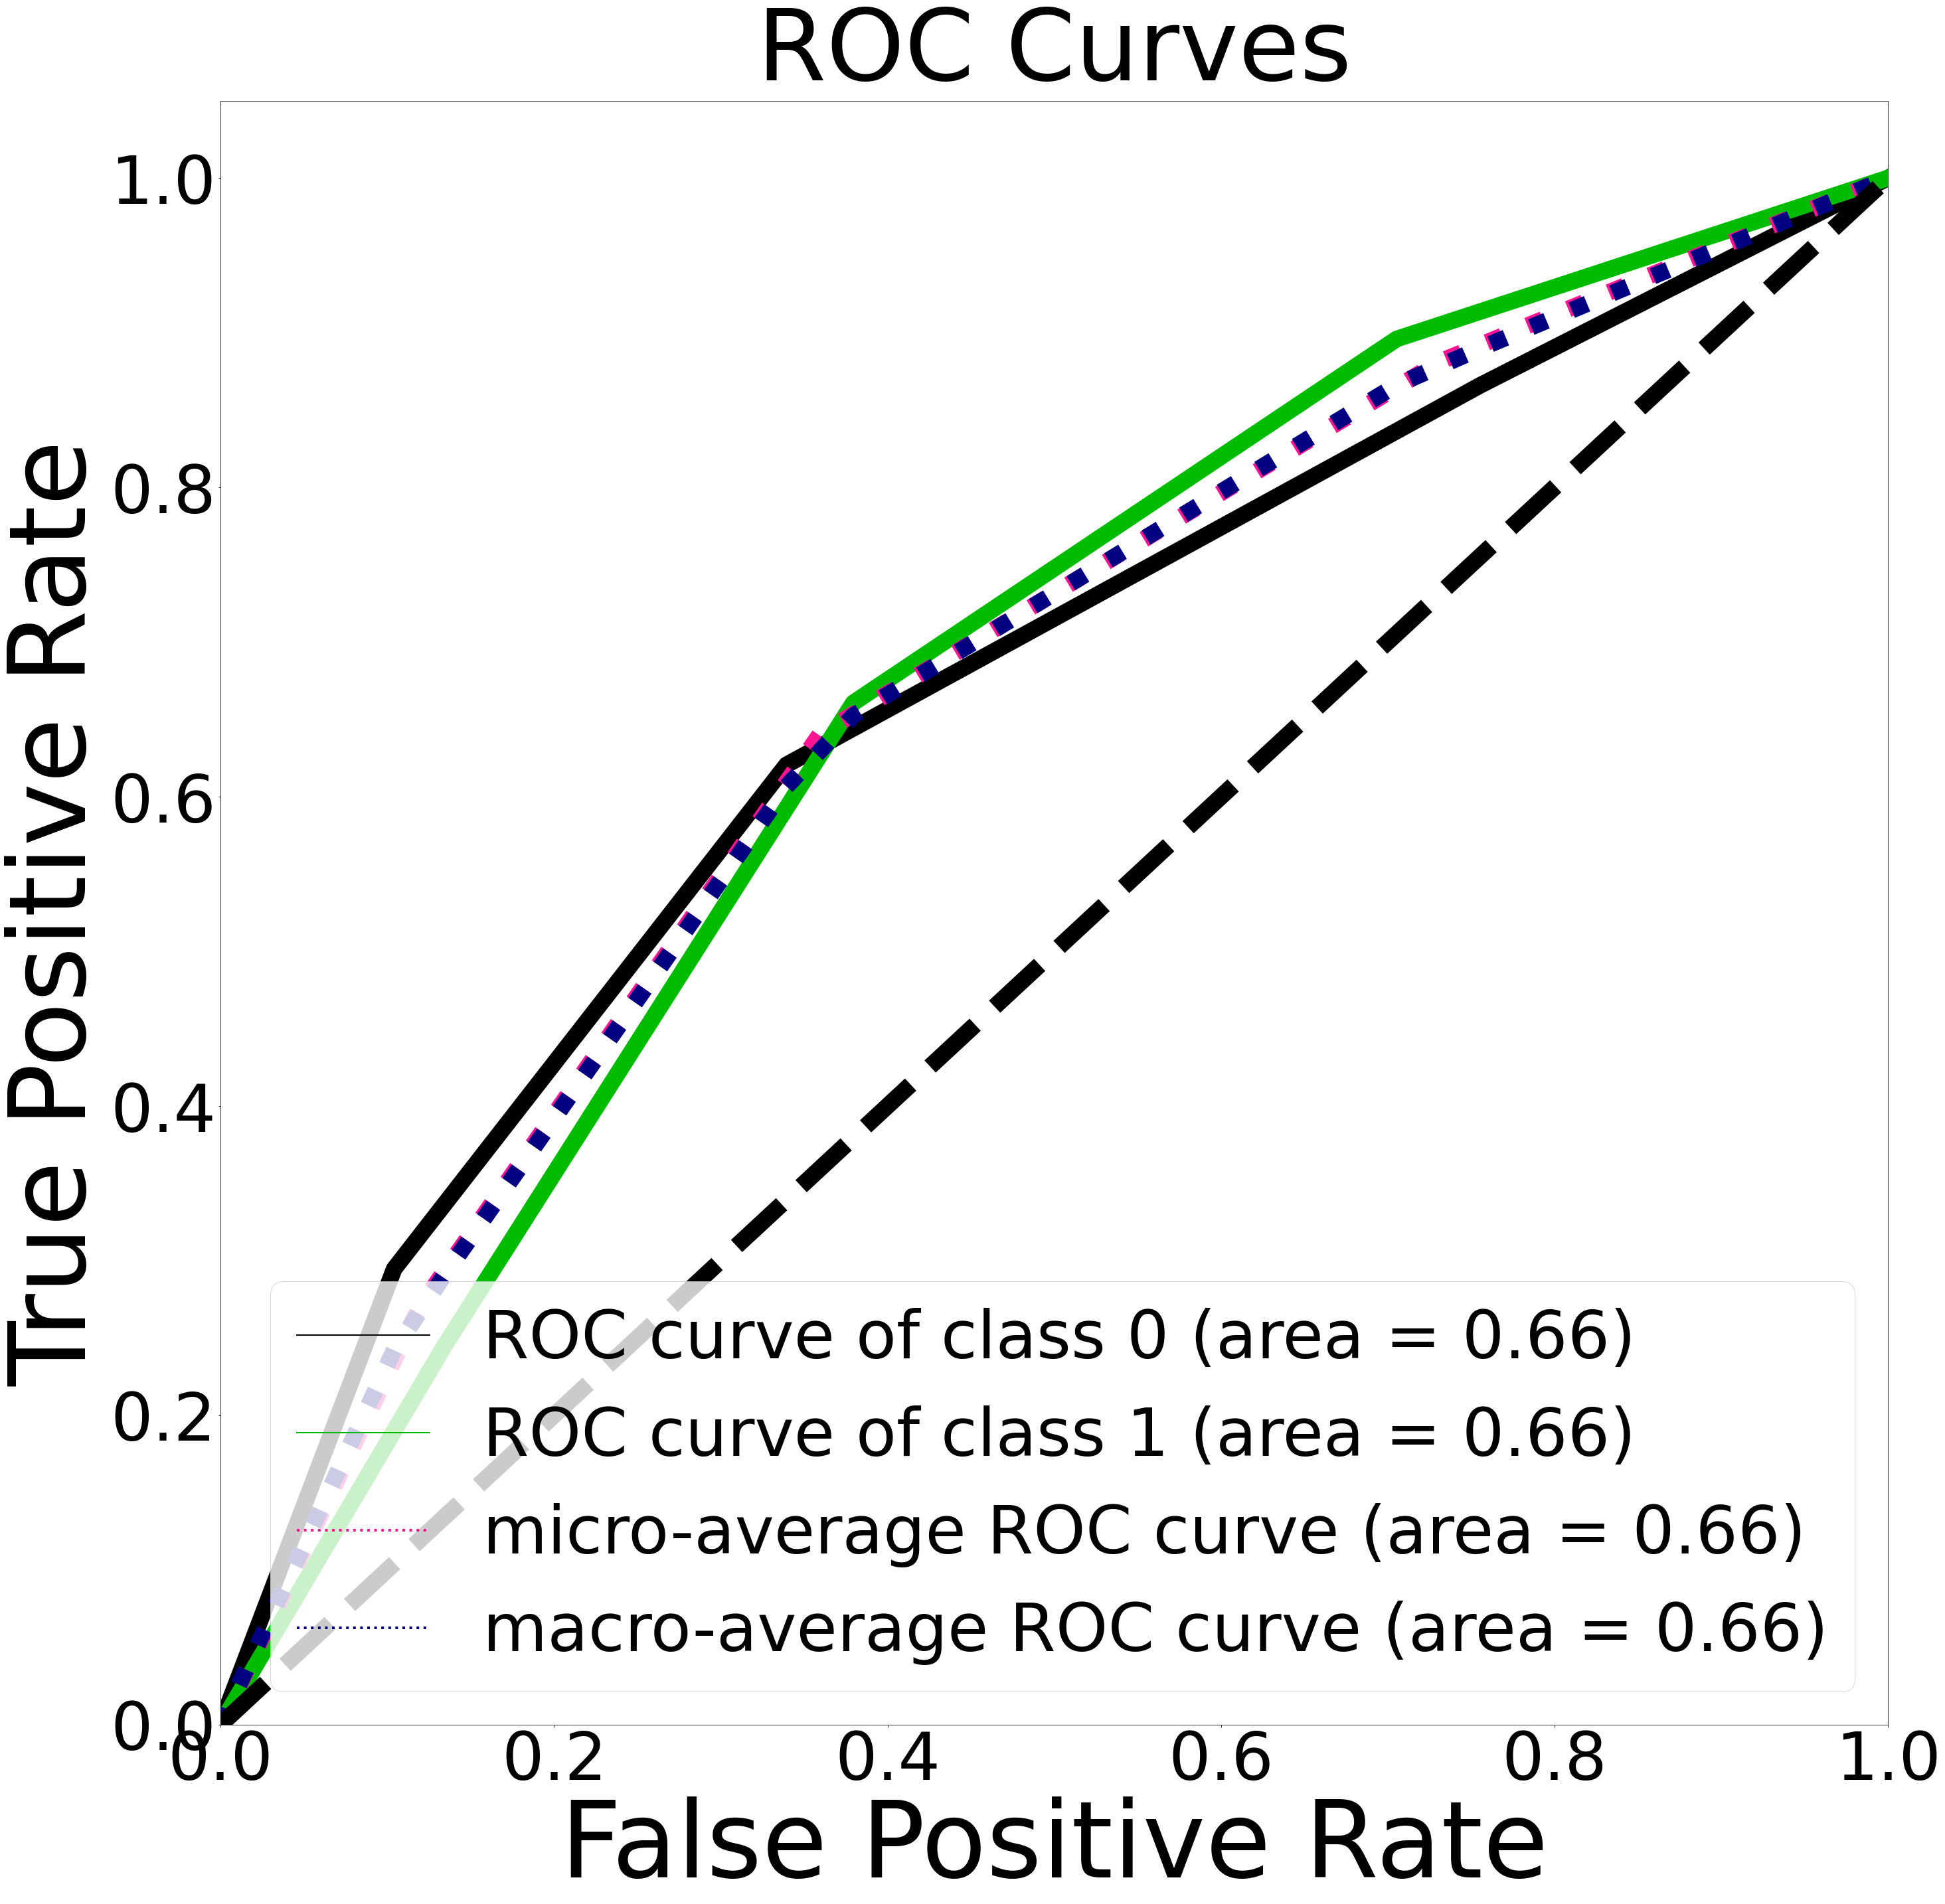

Average precision-recall score Random forest: 0.59


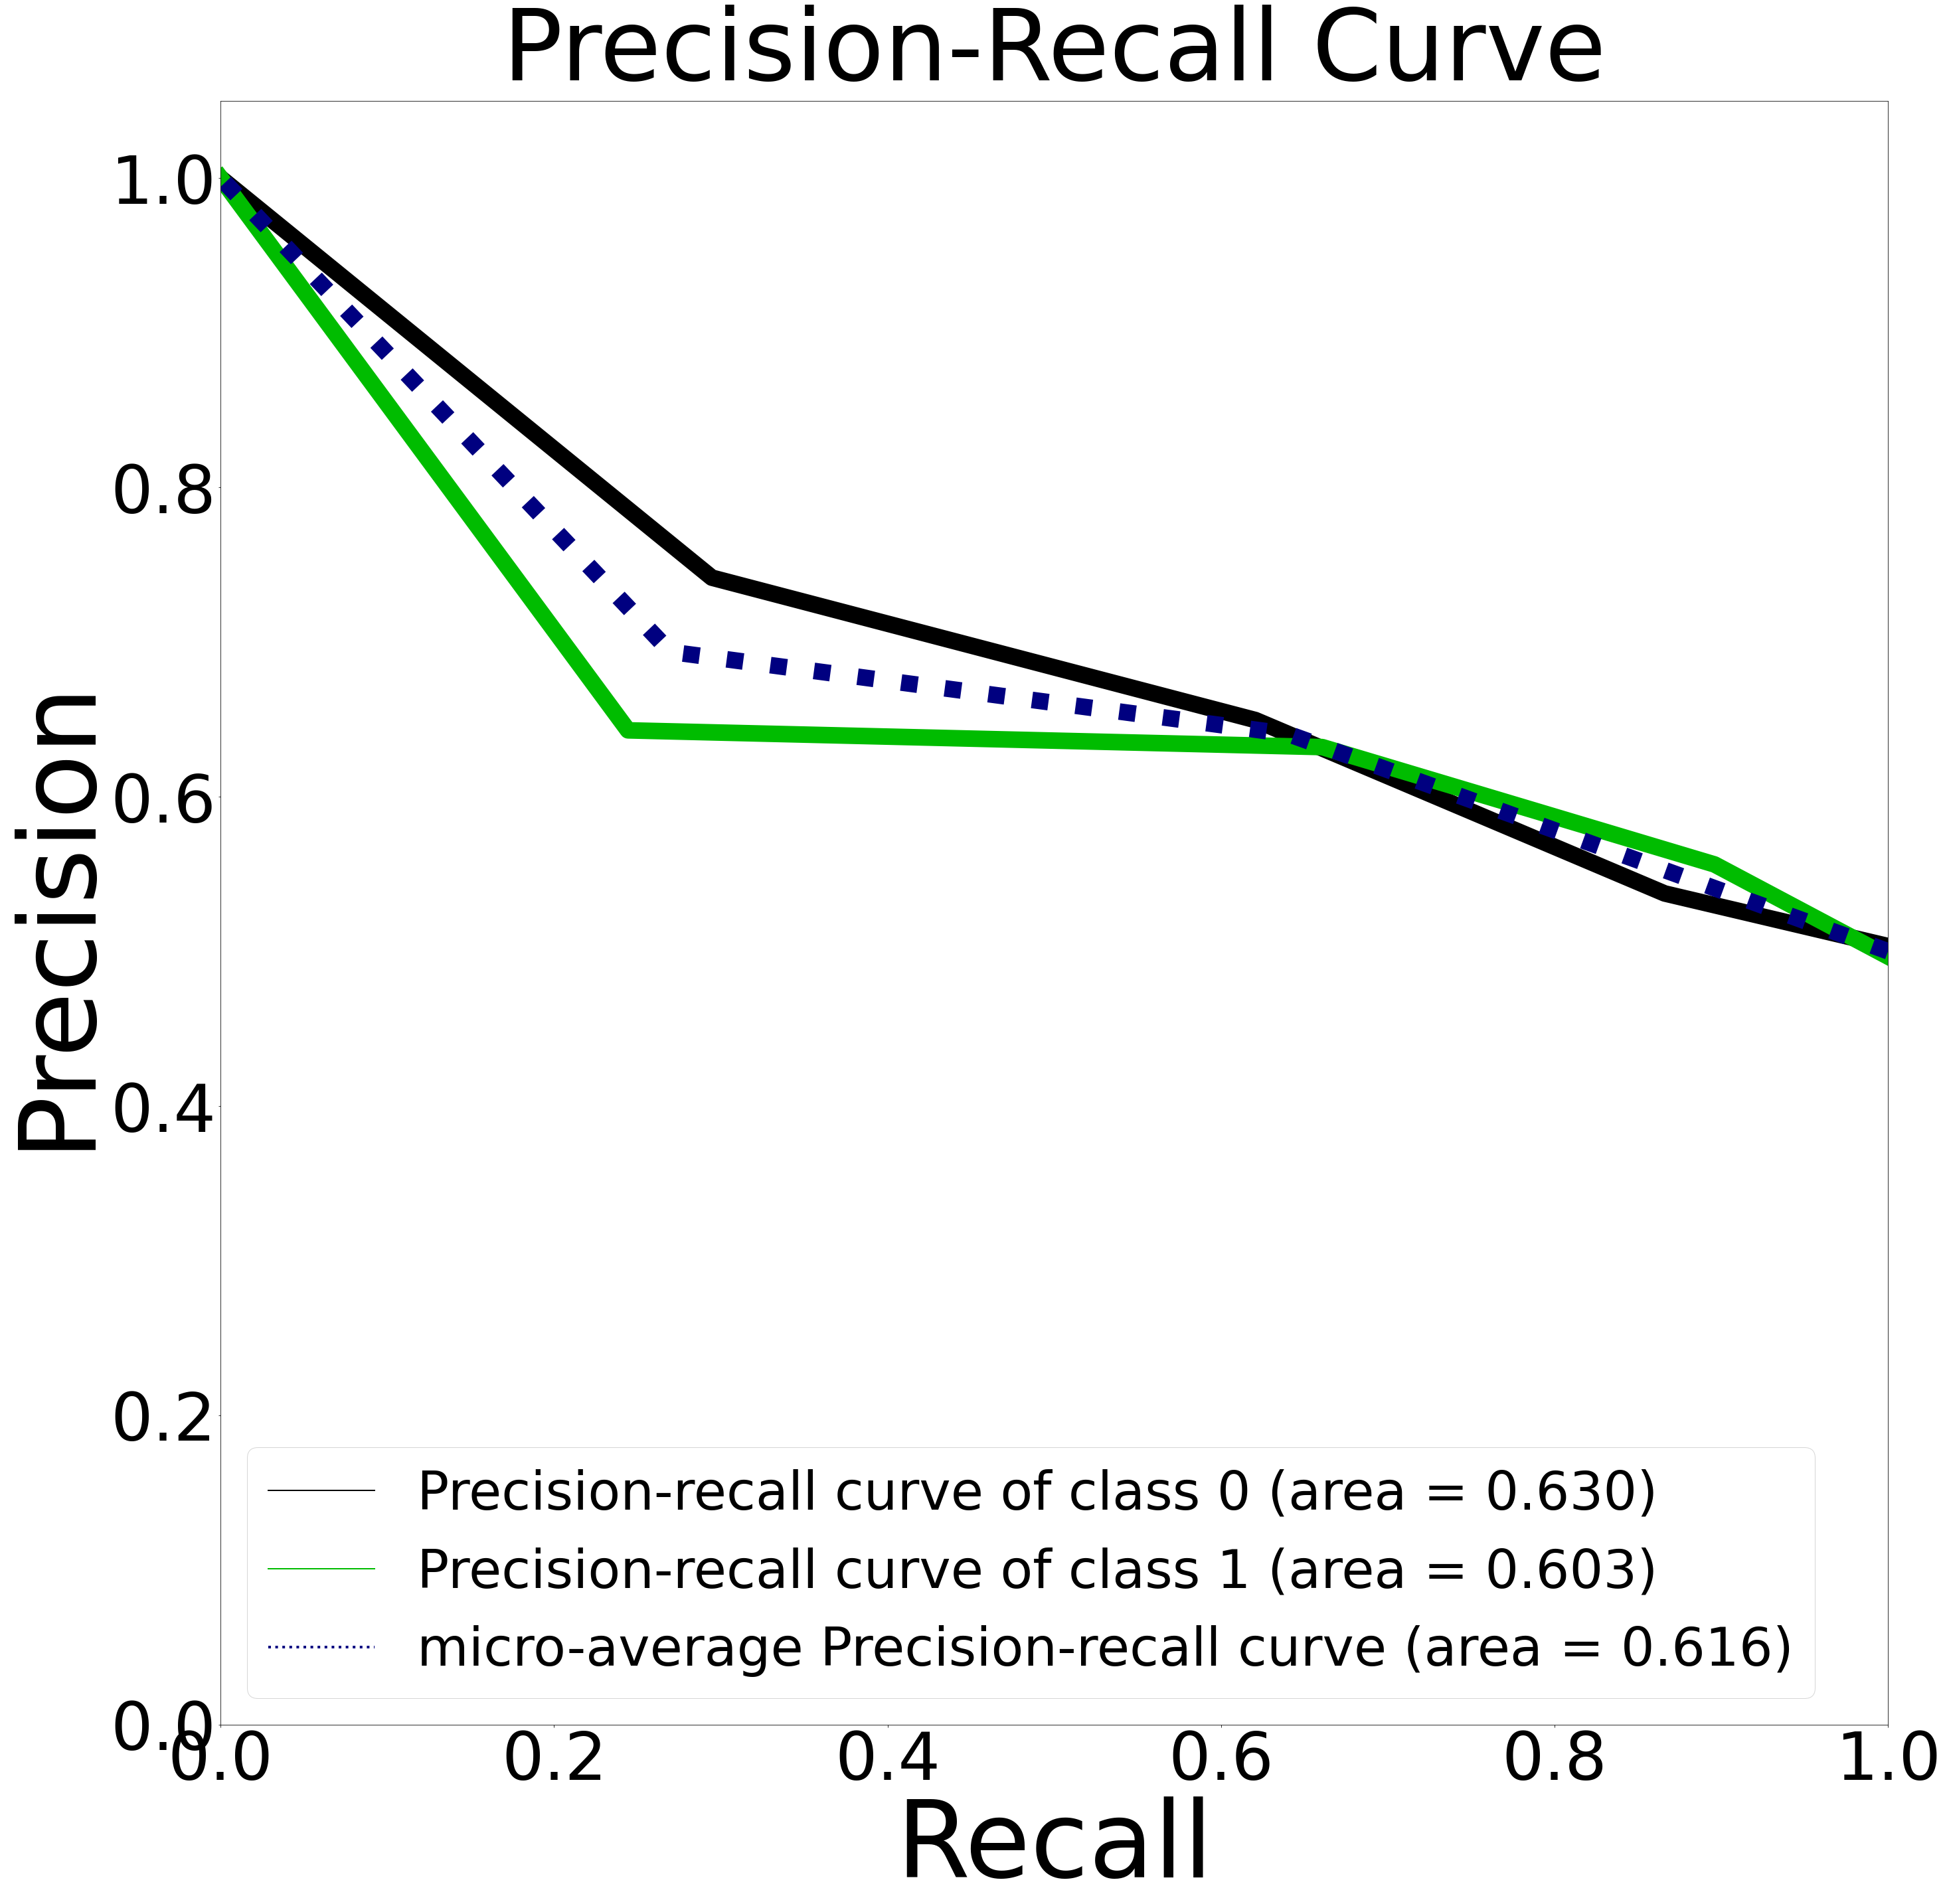

In [12]:
#KNN Classifier best cluster
neighbour = KNeighborsClassifier(n_neighbors = 3).fit(X_train,y_train)
y_predict_KNN = neighbour.predict(X_val)
print("Test set Accuracy for k 3 = " , accuracy_score(y_val, y_predict_KNN))
plot_graphs(neighbour,X_val,y_val, y_predict_KNN)

In [8]:
#Random Forest Classifier Classifier Testing
md =0
while md < 1000:
    md = md+100
    championsTree = RandomForestClassifier(n_estimators = md)
    championsTree.fit(X_train,y_train)
    predict_tree = championsTree.predict(X_val)
    print("Random Forests's Accuracy for Tress = ", md , ":" , accuracy_score(y_val, predict_tree))

Random Forests's Accuracy for Tress =  100 : 0.6314606741573033
Random Forests's Accuracy for Tress =  200 : 0.6224719101123596
Random Forests's Accuracy for Tress =  300 : 0.6134831460674157
Random Forests's Accuracy for Tress =  400 : 0.6337078651685393
Random Forests's Accuracy for Tress =  500 : 0.6292134831460674
Random Forests's Accuracy for Tress =  600 : 0.6247191011235955
Random Forests's Accuracy for Tress =  700 : 0.6292134831460674
Random Forests's Accuracy for Tress =  800 : 0.6247191011235955
Random Forests's Accuracy for Tress =  900 : 0.6337078651685393
Random Forests's Accuracy for Tress =  1000 : 0.6337078651685393


Minimum value for Trees that improves results = 400
Confusion matrix, without normalization
[[130  94]
 [ 73 148]]
Normalized confusion matrix
[[0.58035714 0.41964286]
 [0.33031674 0.66968326]]


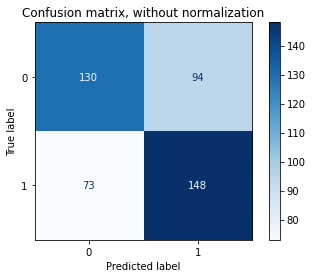

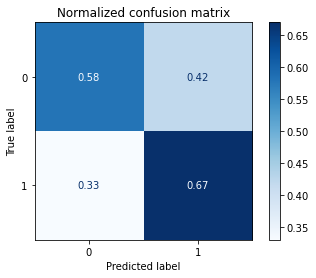

              precision    recall  f1-score   support

           0       0.64      0.58      0.61       224
           1       0.61      0.67      0.64       221

    accuracy                           0.62       445
   macro avg       0.63      0.63      0.62       445
weighted avg       0.63      0.62      0.62       445



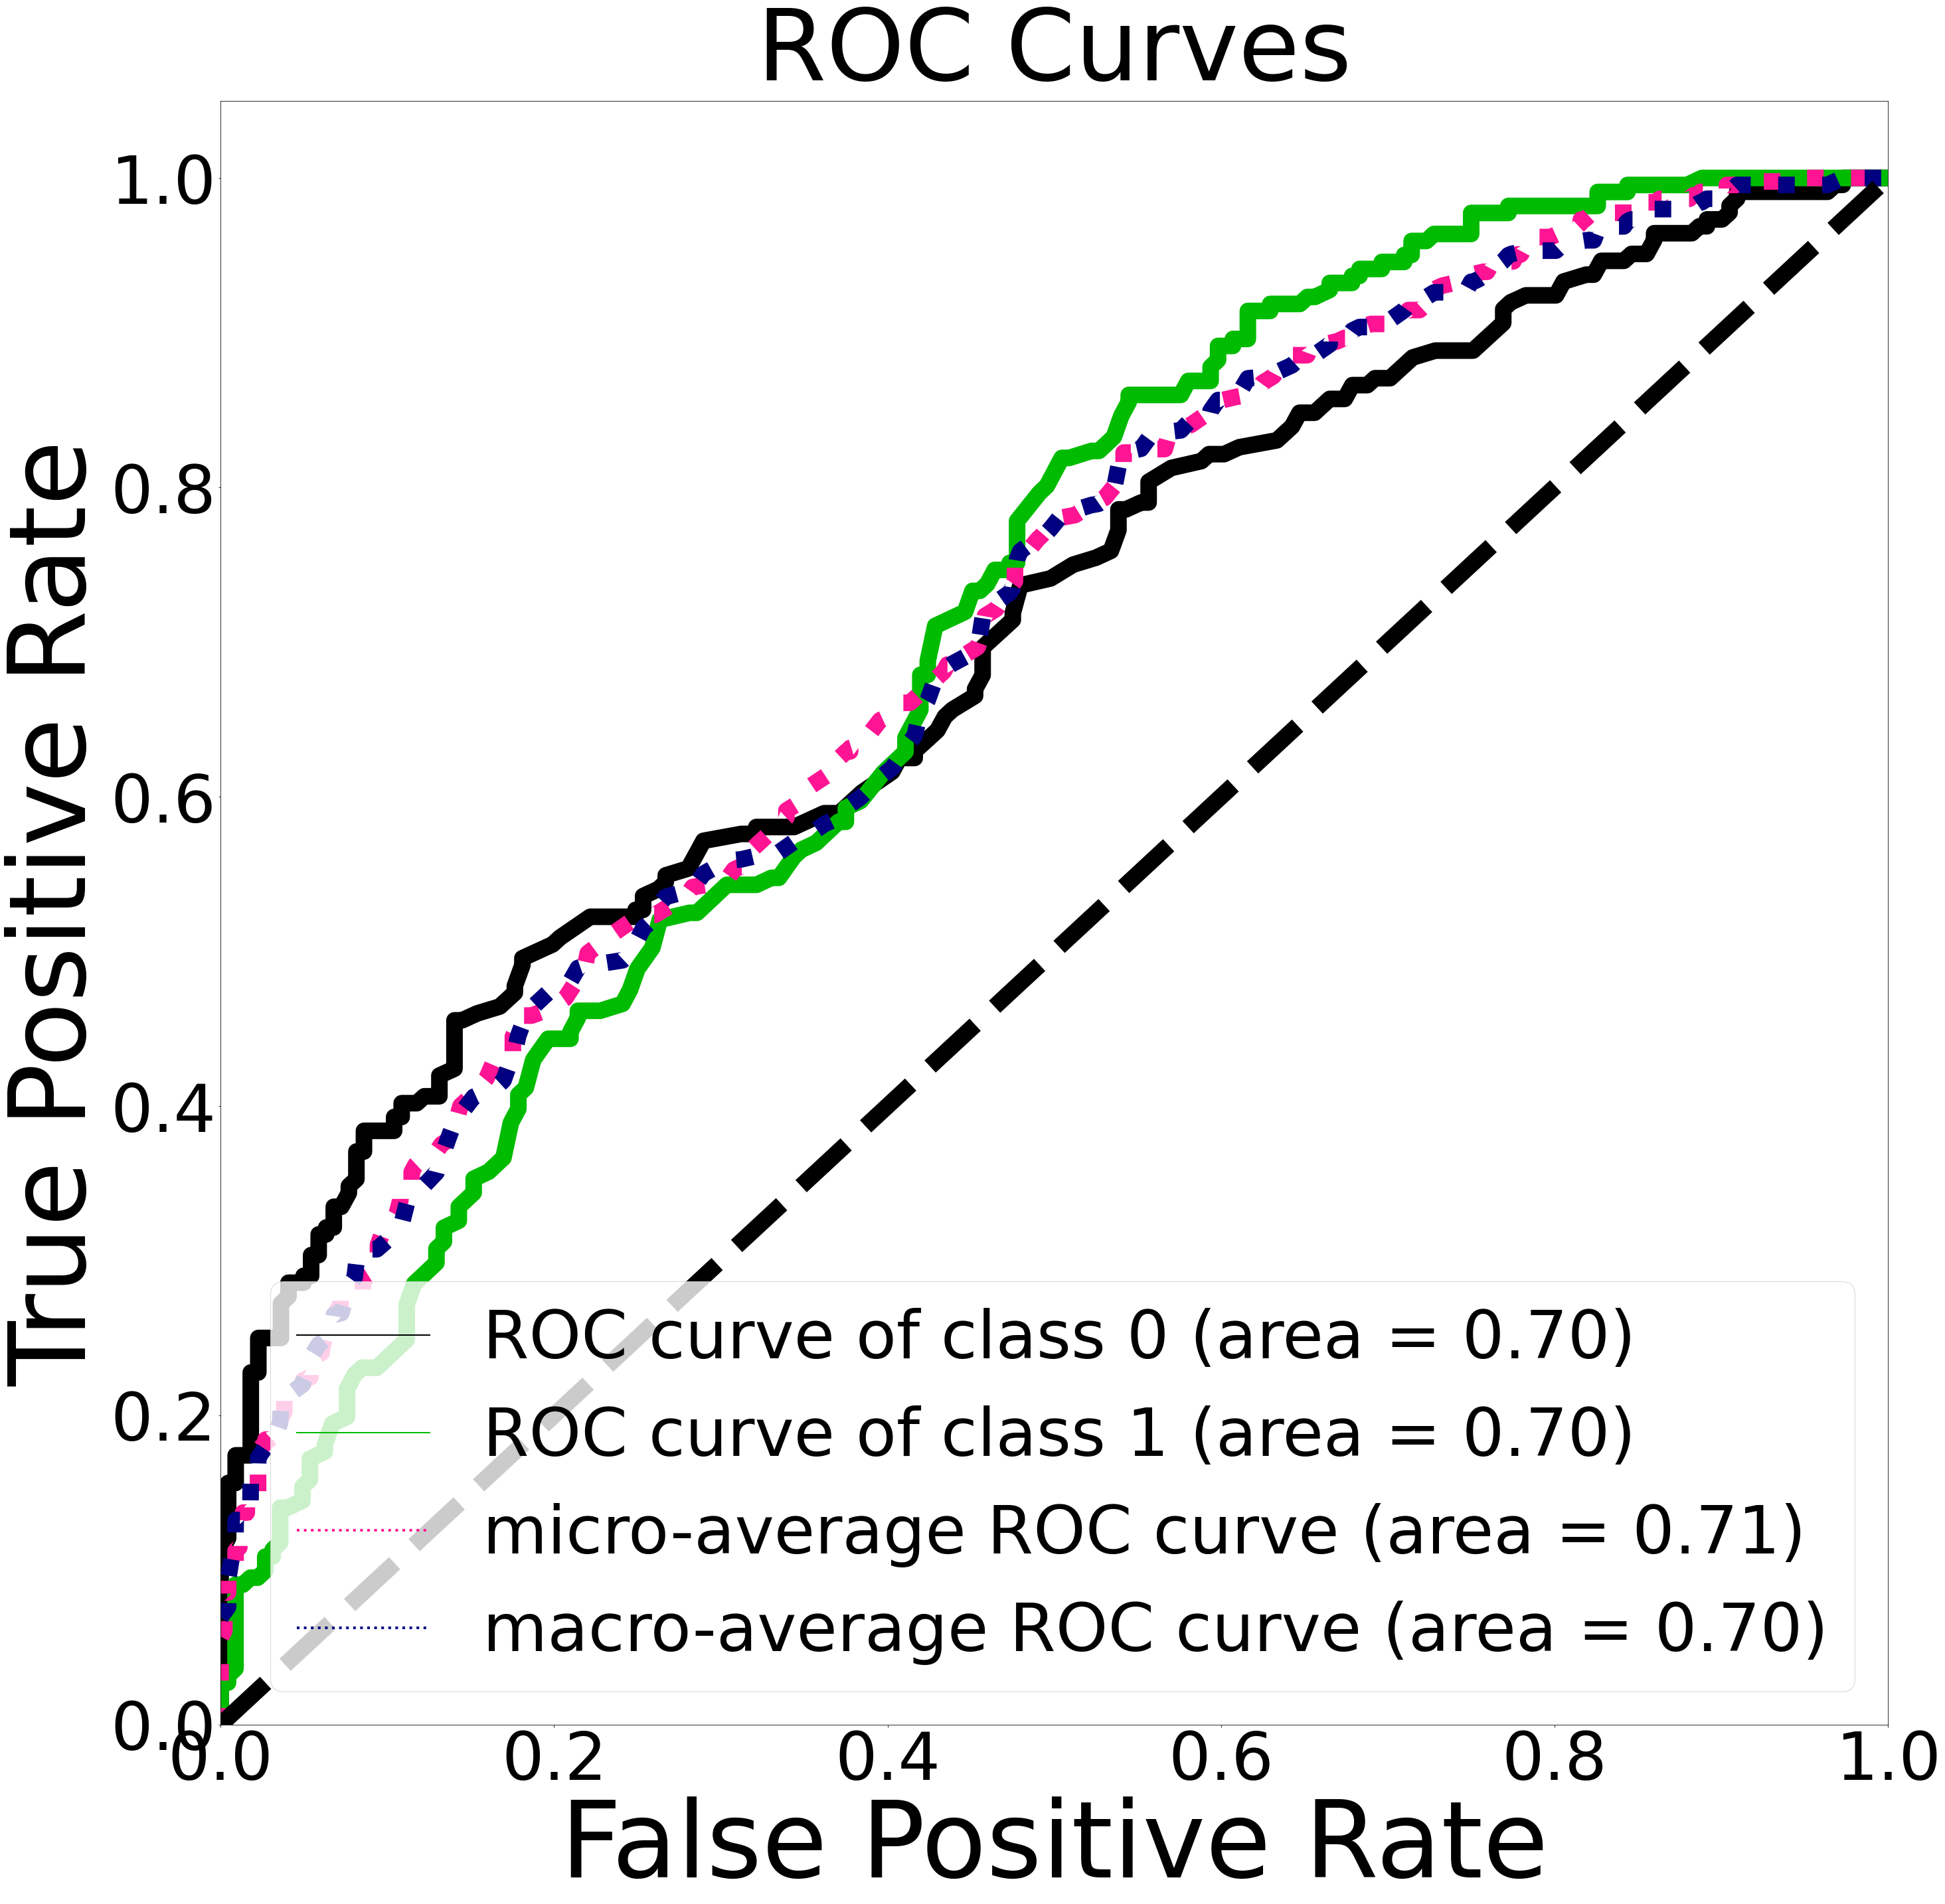

Average precision-recall score Random forest: 0.57


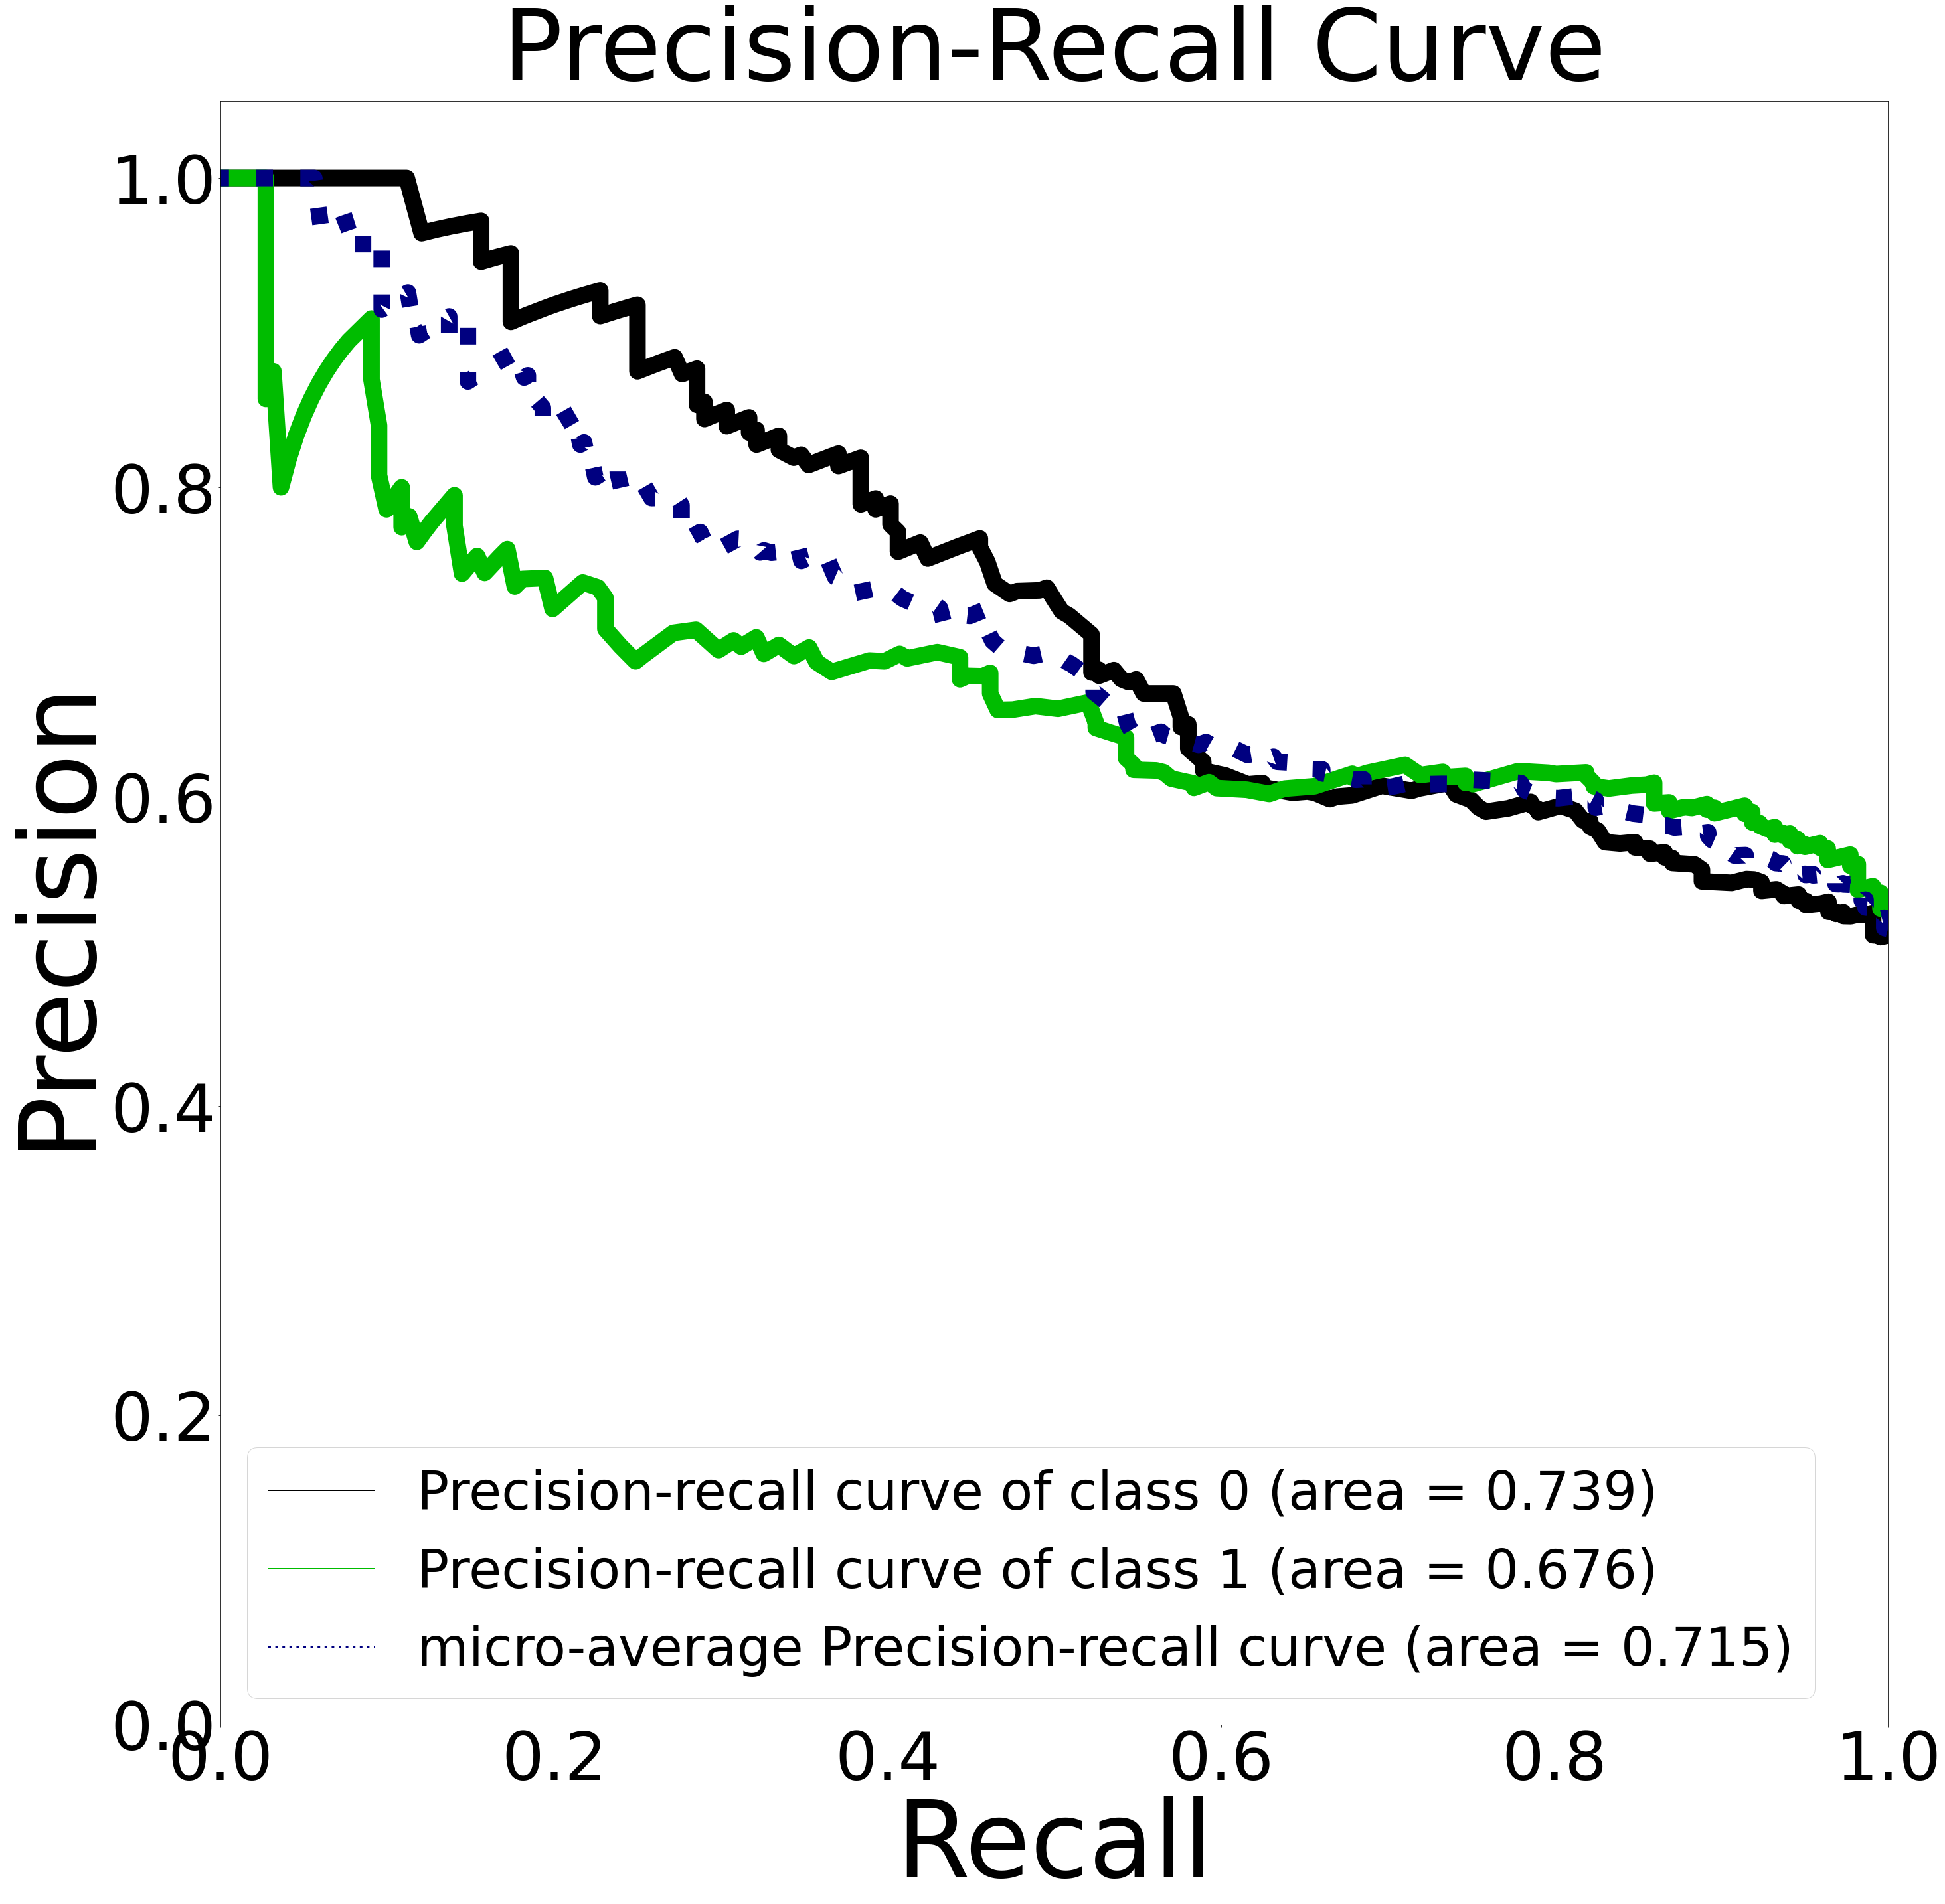

In [13]:
#Random Forest Classifier best Tree counts
print ("Minimum value for Trees that improves results = 400")
championsTree = RandomForestClassifier(n_estimators = 400)
championsTree.fit(X_train,y_train)
predict_tree = championsTree.predict(X_val)
plot_graphs(championsTree,X_val,y_val, predict_tree)

In [9]:
#Suport Vector Machine Testing
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
y_svm = clf.predict(X_val)
print("Support vector machine accuracy for Radial basis function:" , accuracy_score(y_val, y_svm))
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 
y_svm = clf.predict(X_val)
print("Support vector machine accuracy for Linear:" , accuracy_score(y_val, y_svm))
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train) 
y_svm = clf.predict(X_val)
print("Support vector machine accuracy for Polynomial:" , accuracy_score(y_val, y_svm))
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train) 
y_svm = clf.predict(X_val)
print("Support vector machine accuracy for Sigmoid:" , accuracy_score(y_val, y_svm))

Support vector machine accuracy for Radial basis function: 0.6134831460674157
Support vector machine accuracy for Linear: 0.6337078651685393
Support vector machine accuracy for Polynomial: 0.6112359550561798
Support vector machine accuracy for Sigmoid: 0.5820224719101124


As best score provided with linear we will train it in the same.
Support vector machine accuracy Best Kernel score : 0.6337078651685393
Confusion matrix, without normalization
[[125  99]
 [ 64 157]]
Normalized confusion matrix
[[0.55803571 0.44196429]
 [0.28959276 0.71040724]]


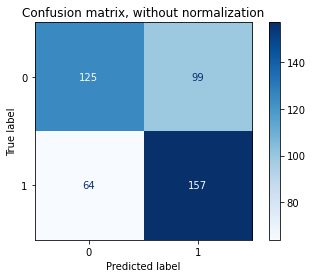

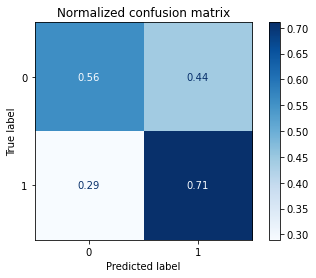

              precision    recall  f1-score   support

           0       0.66      0.56      0.61       224
           1       0.61      0.71      0.66       221

    accuracy                           0.63       445
   macro avg       0.64      0.63      0.63       445
weighted avg       0.64      0.63      0.63       445



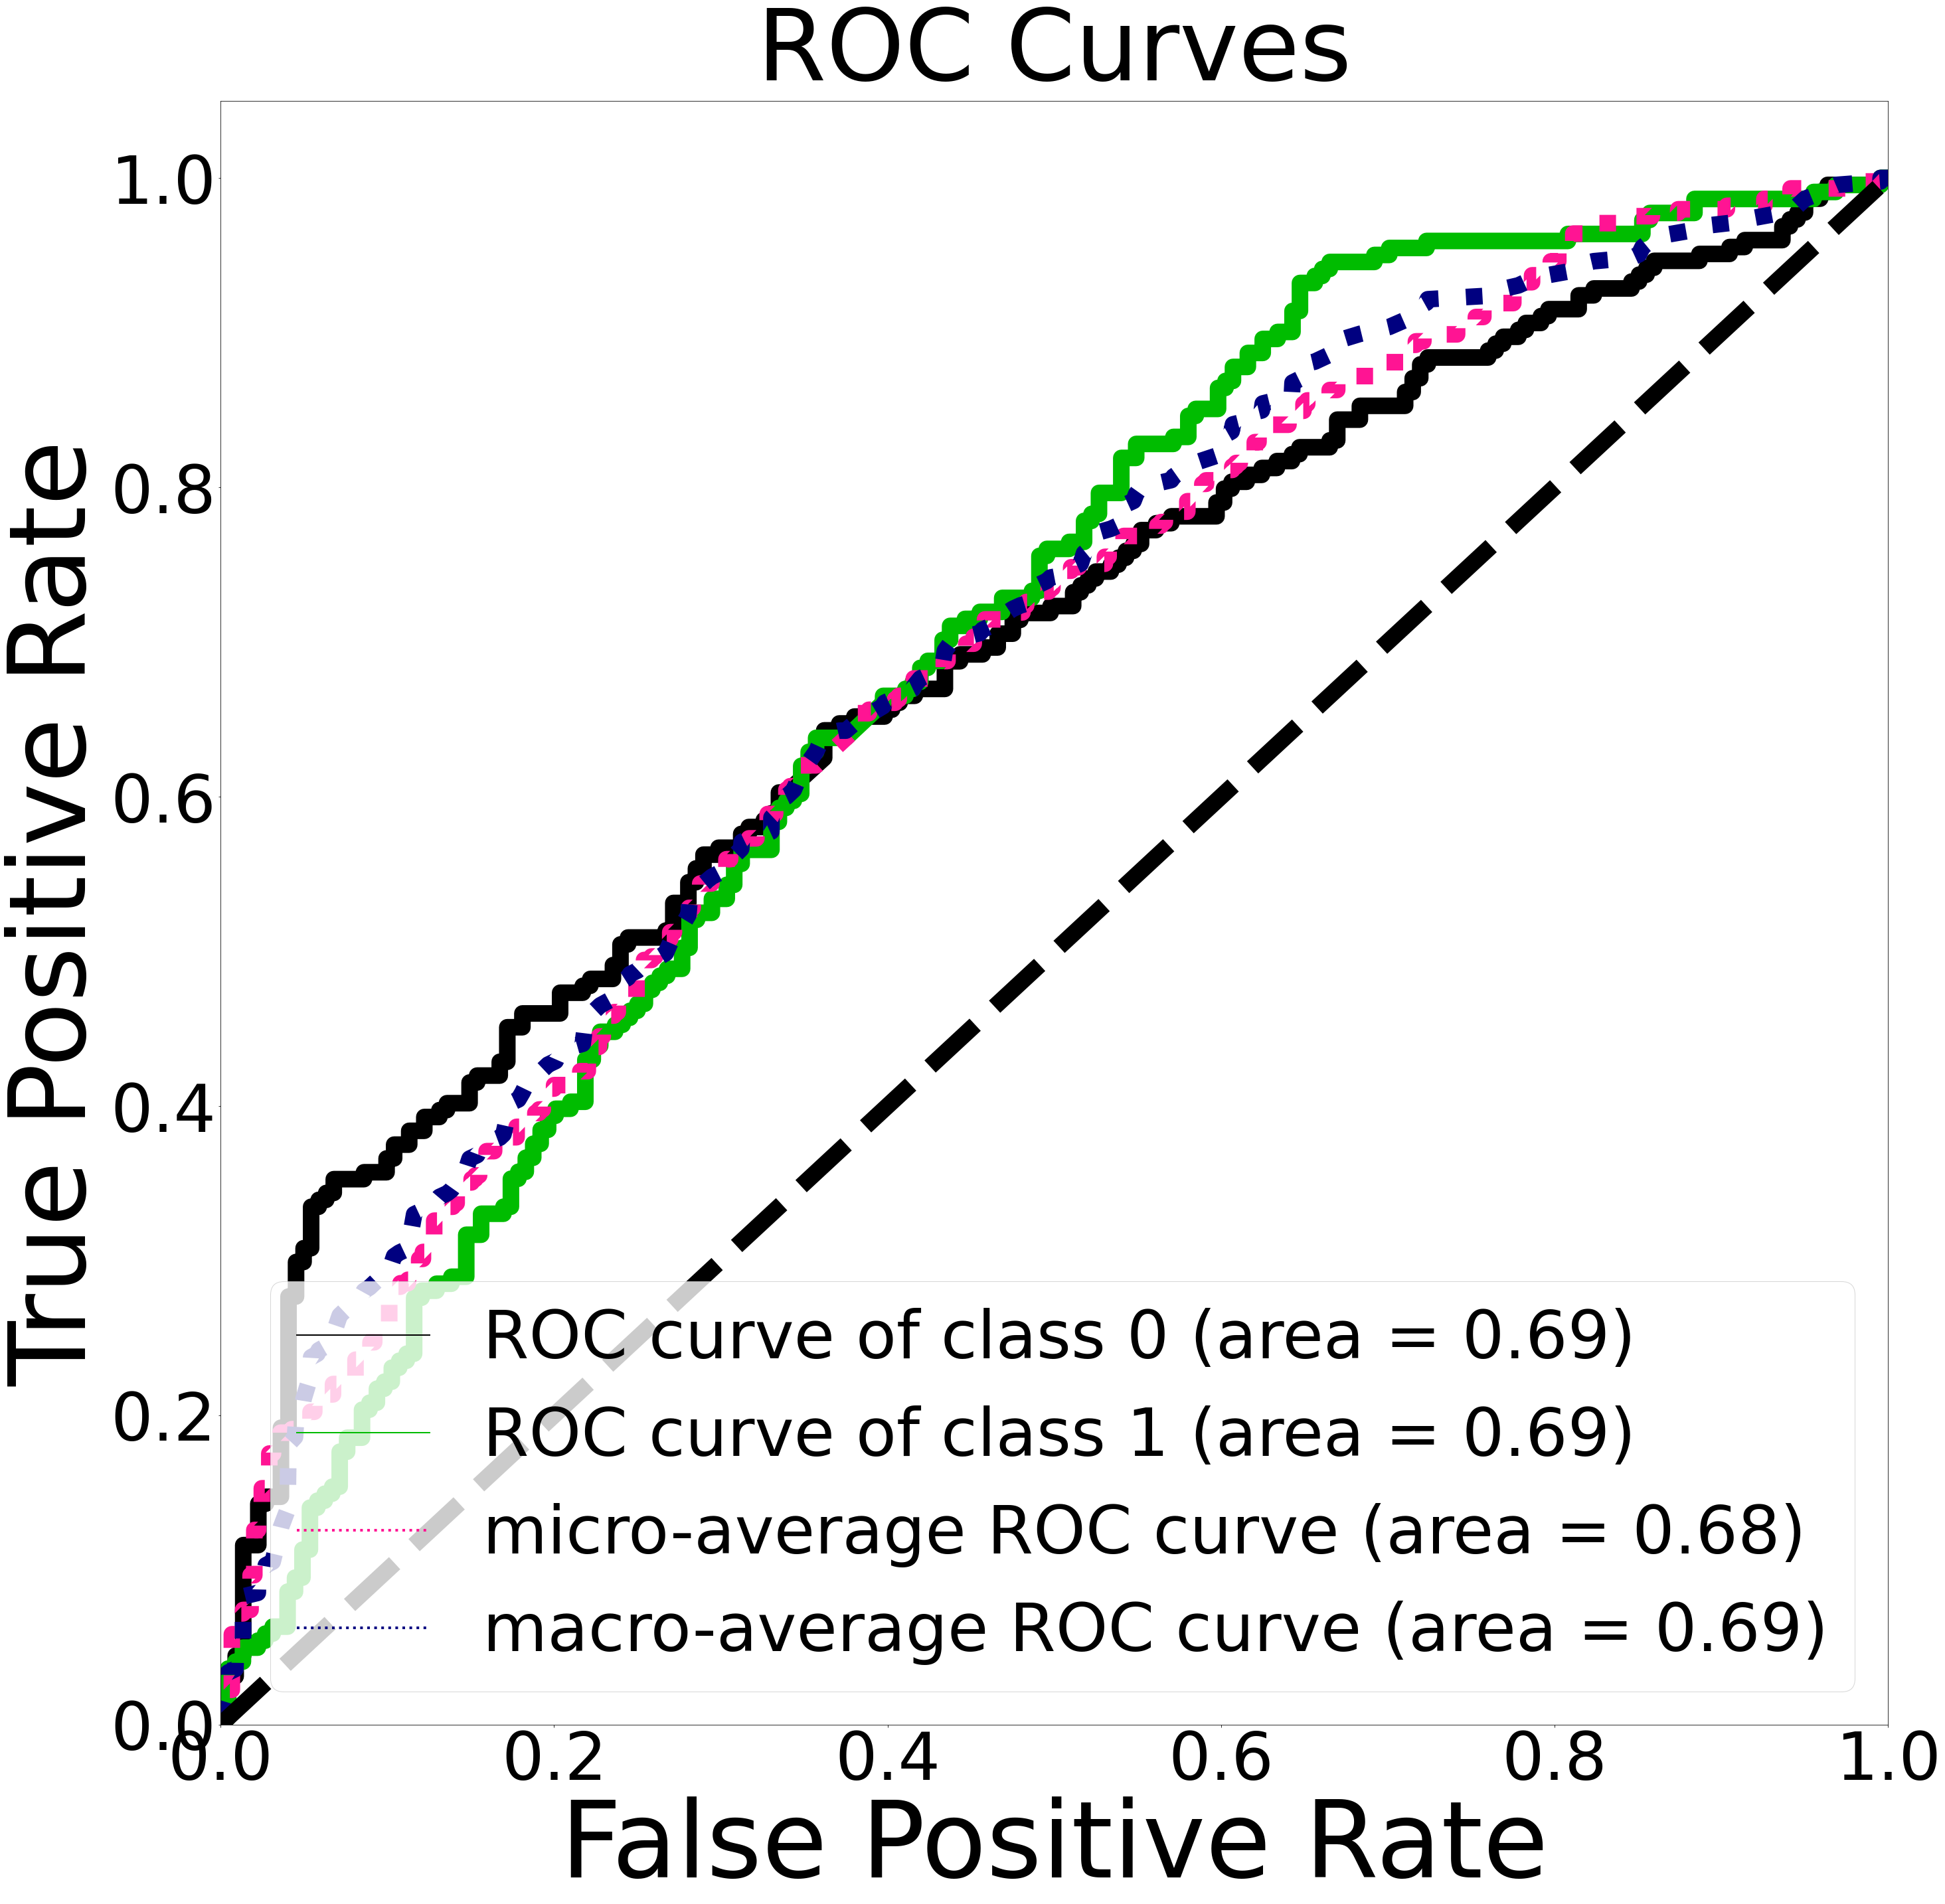

Average precision-recall score Random forest: 0.58


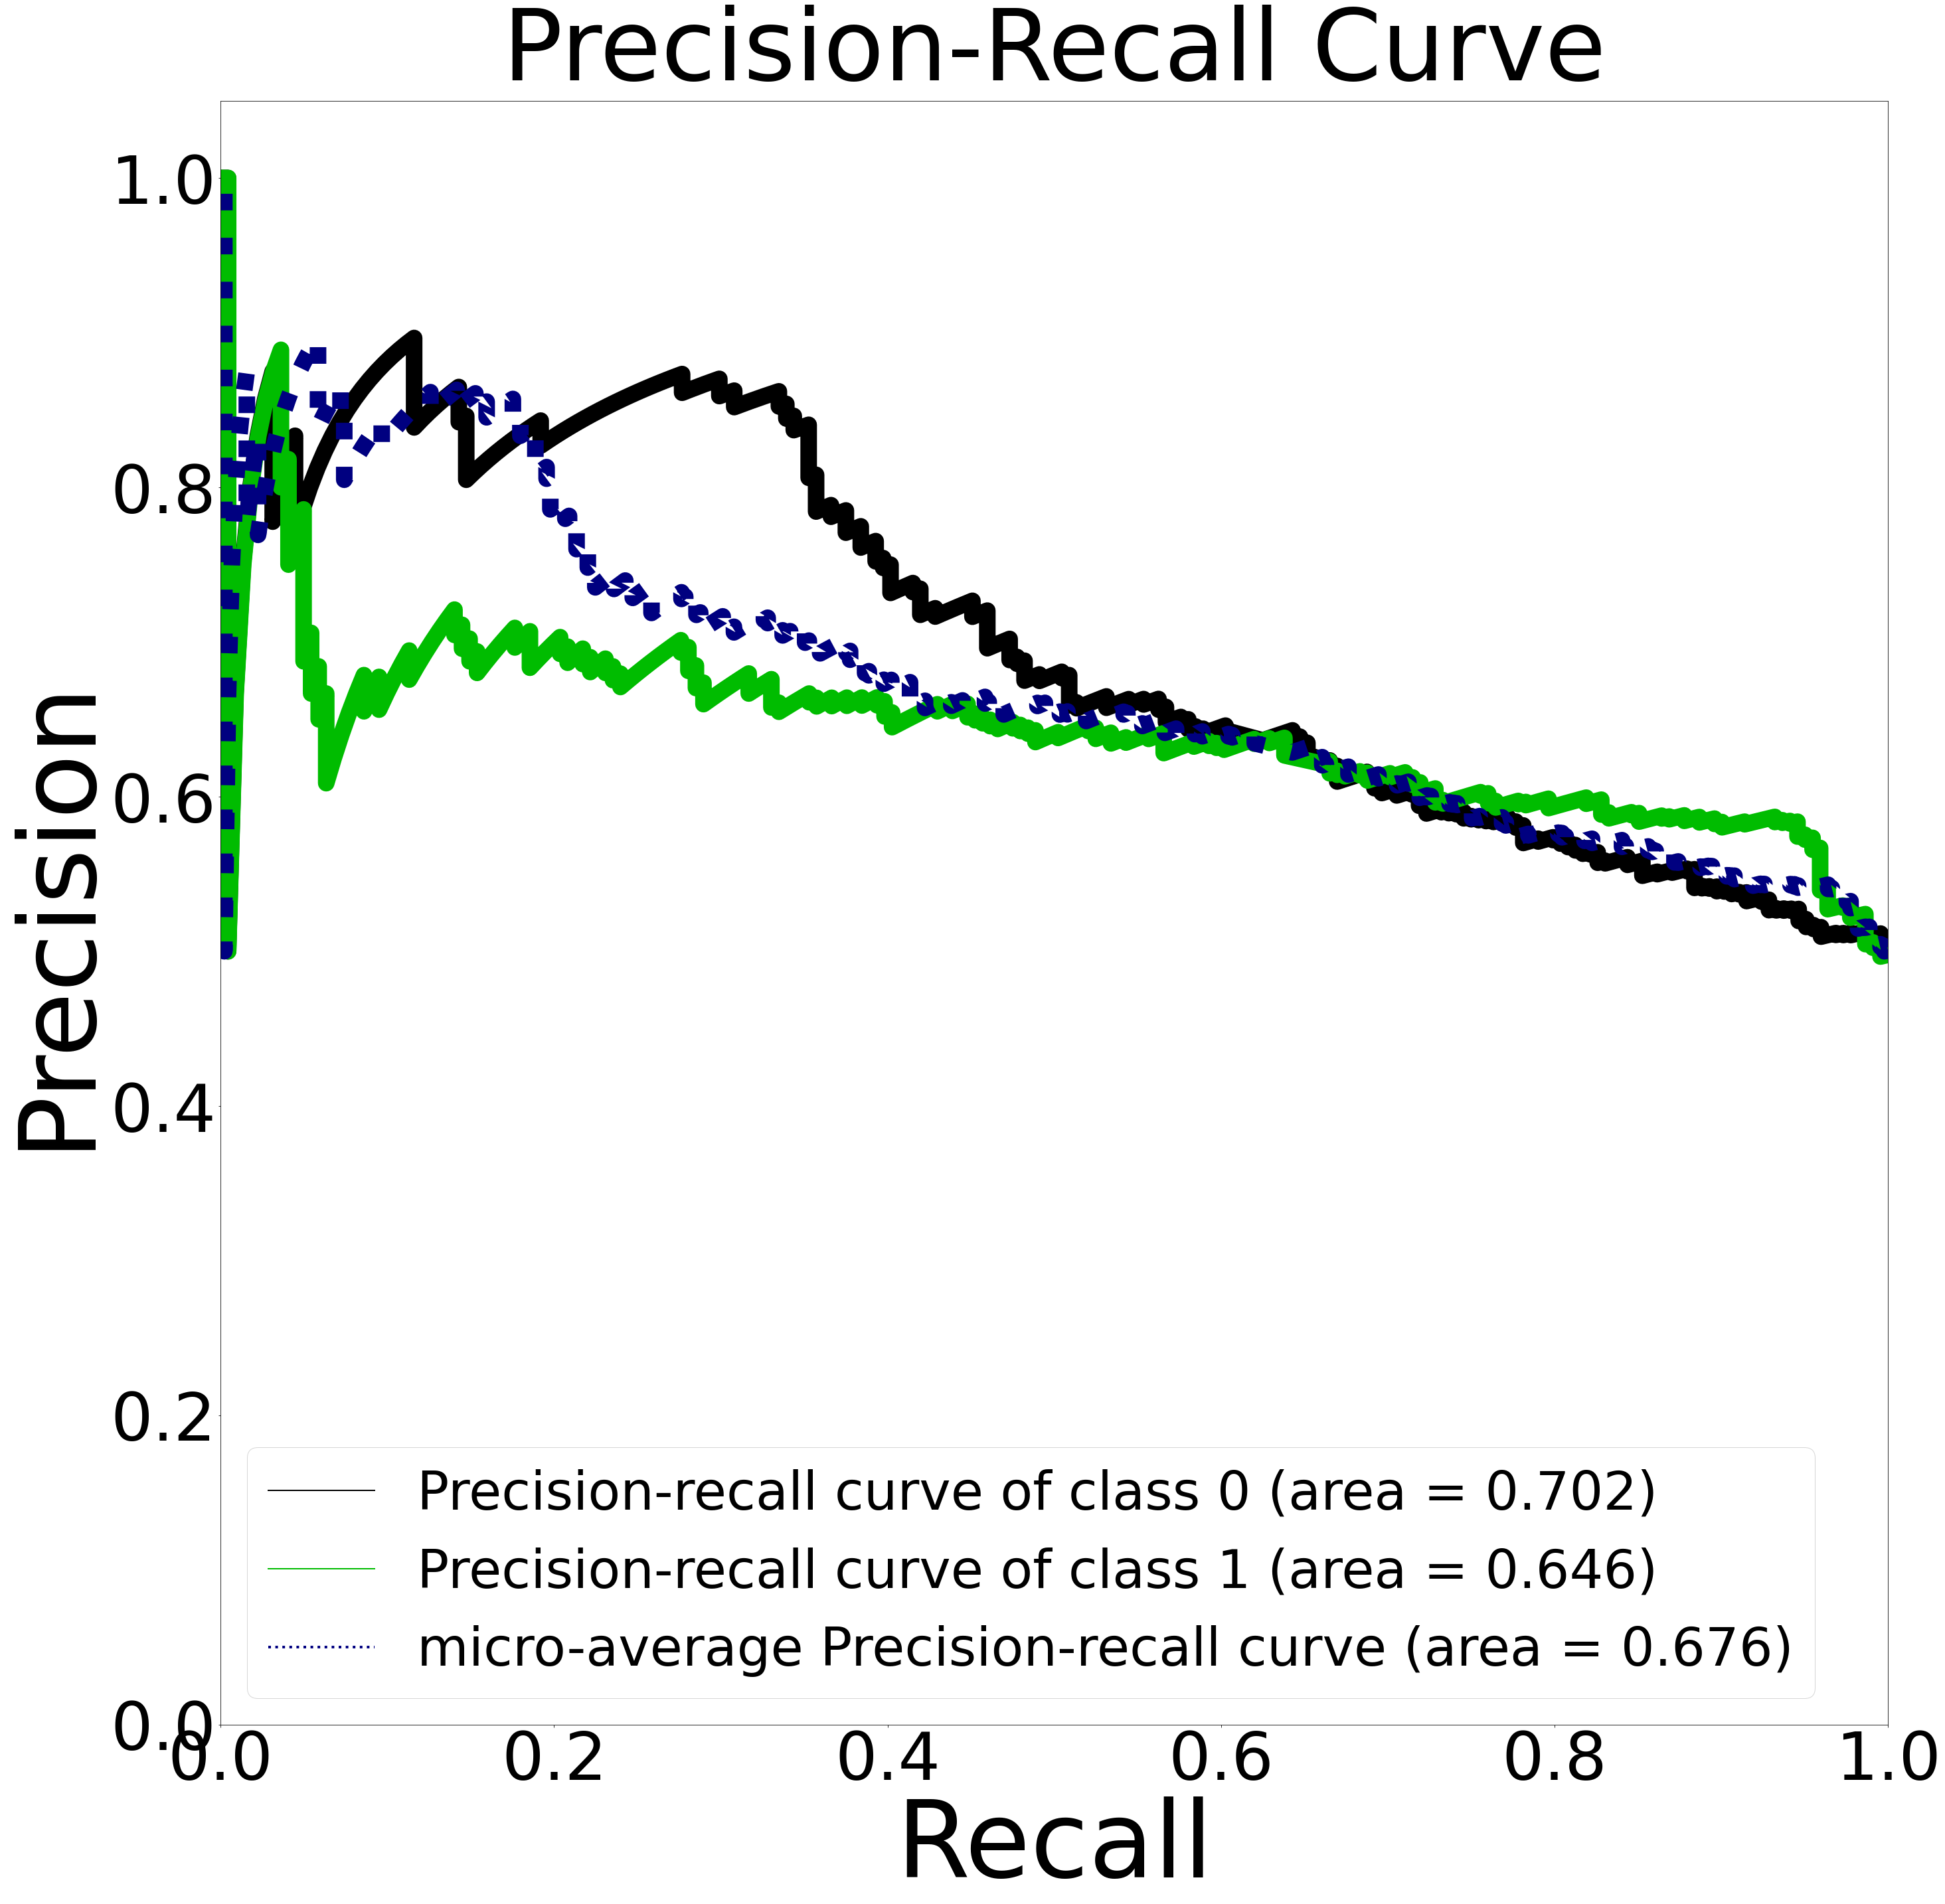

In [14]:
#SVM best Transforming method
print("As best score provided with linear we will train it in the same.")
clf = svm.SVC(kernel='linear',probability=True)
clf.fit(X_train, y_train) 
y_svm = clf.predict(X_val)
print("Support vector machine accuracy Best Kernel score :" , accuracy_score(y_val, y_svm))
plot_graphs(clf,X_val,y_val, y_svm)

In [11]:
#Neural Network Classifier Testing
neuro = MLPClassifier(learning_rate='constant',max_iter=1600)
neuro.fit(X_train, y_train)
y_neuro = 0
y_neuro = neuro.predict(X_val)
print("MLPC accuracy for Constant Learning:" , accuracy_score(y_val, y_neuro))
neuro = MLPClassifier(learning_rate='invscaling',max_iter=1600)
neuro.fit(X_train, y_train)
y_neuro = 0
y_neuro = neuro.predict(X_val)
print("MLPC accuracy for invscaling Learning:" , accuracy_score(y_val, y_neuro))
neuro = MLPClassifier(learning_rate='adaptive',max_iter=1600)
neuro.fit(X_train, y_train)
y_neuro = 0
y_neuro = neuro.predict(X_val)
print("MLPC accuracy for adaptive Learning:" , accuracy_score(y_val, y_neuro))

MLPC accuracy for Constant Learning: 0.5955056179775281
MLPC accuracy for invscaling Learning: 0.5865168539325842
MLPC accuracy for adaptive Learning: 0.5865168539325842


Confusion matrix, without normalization
[[131  93]
 [ 84 137]]
Normalized confusion matrix
[[0.58482143 0.41517857]
 [0.3800905  0.6199095 ]]


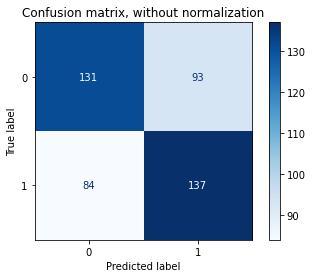

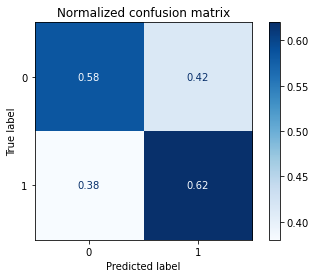

              precision    recall  f1-score   support

           0       0.61      0.58      0.60       224
           1       0.60      0.62      0.61       221

    accuracy                           0.60       445
   macro avg       0.60      0.60      0.60       445
weighted avg       0.60      0.60      0.60       445



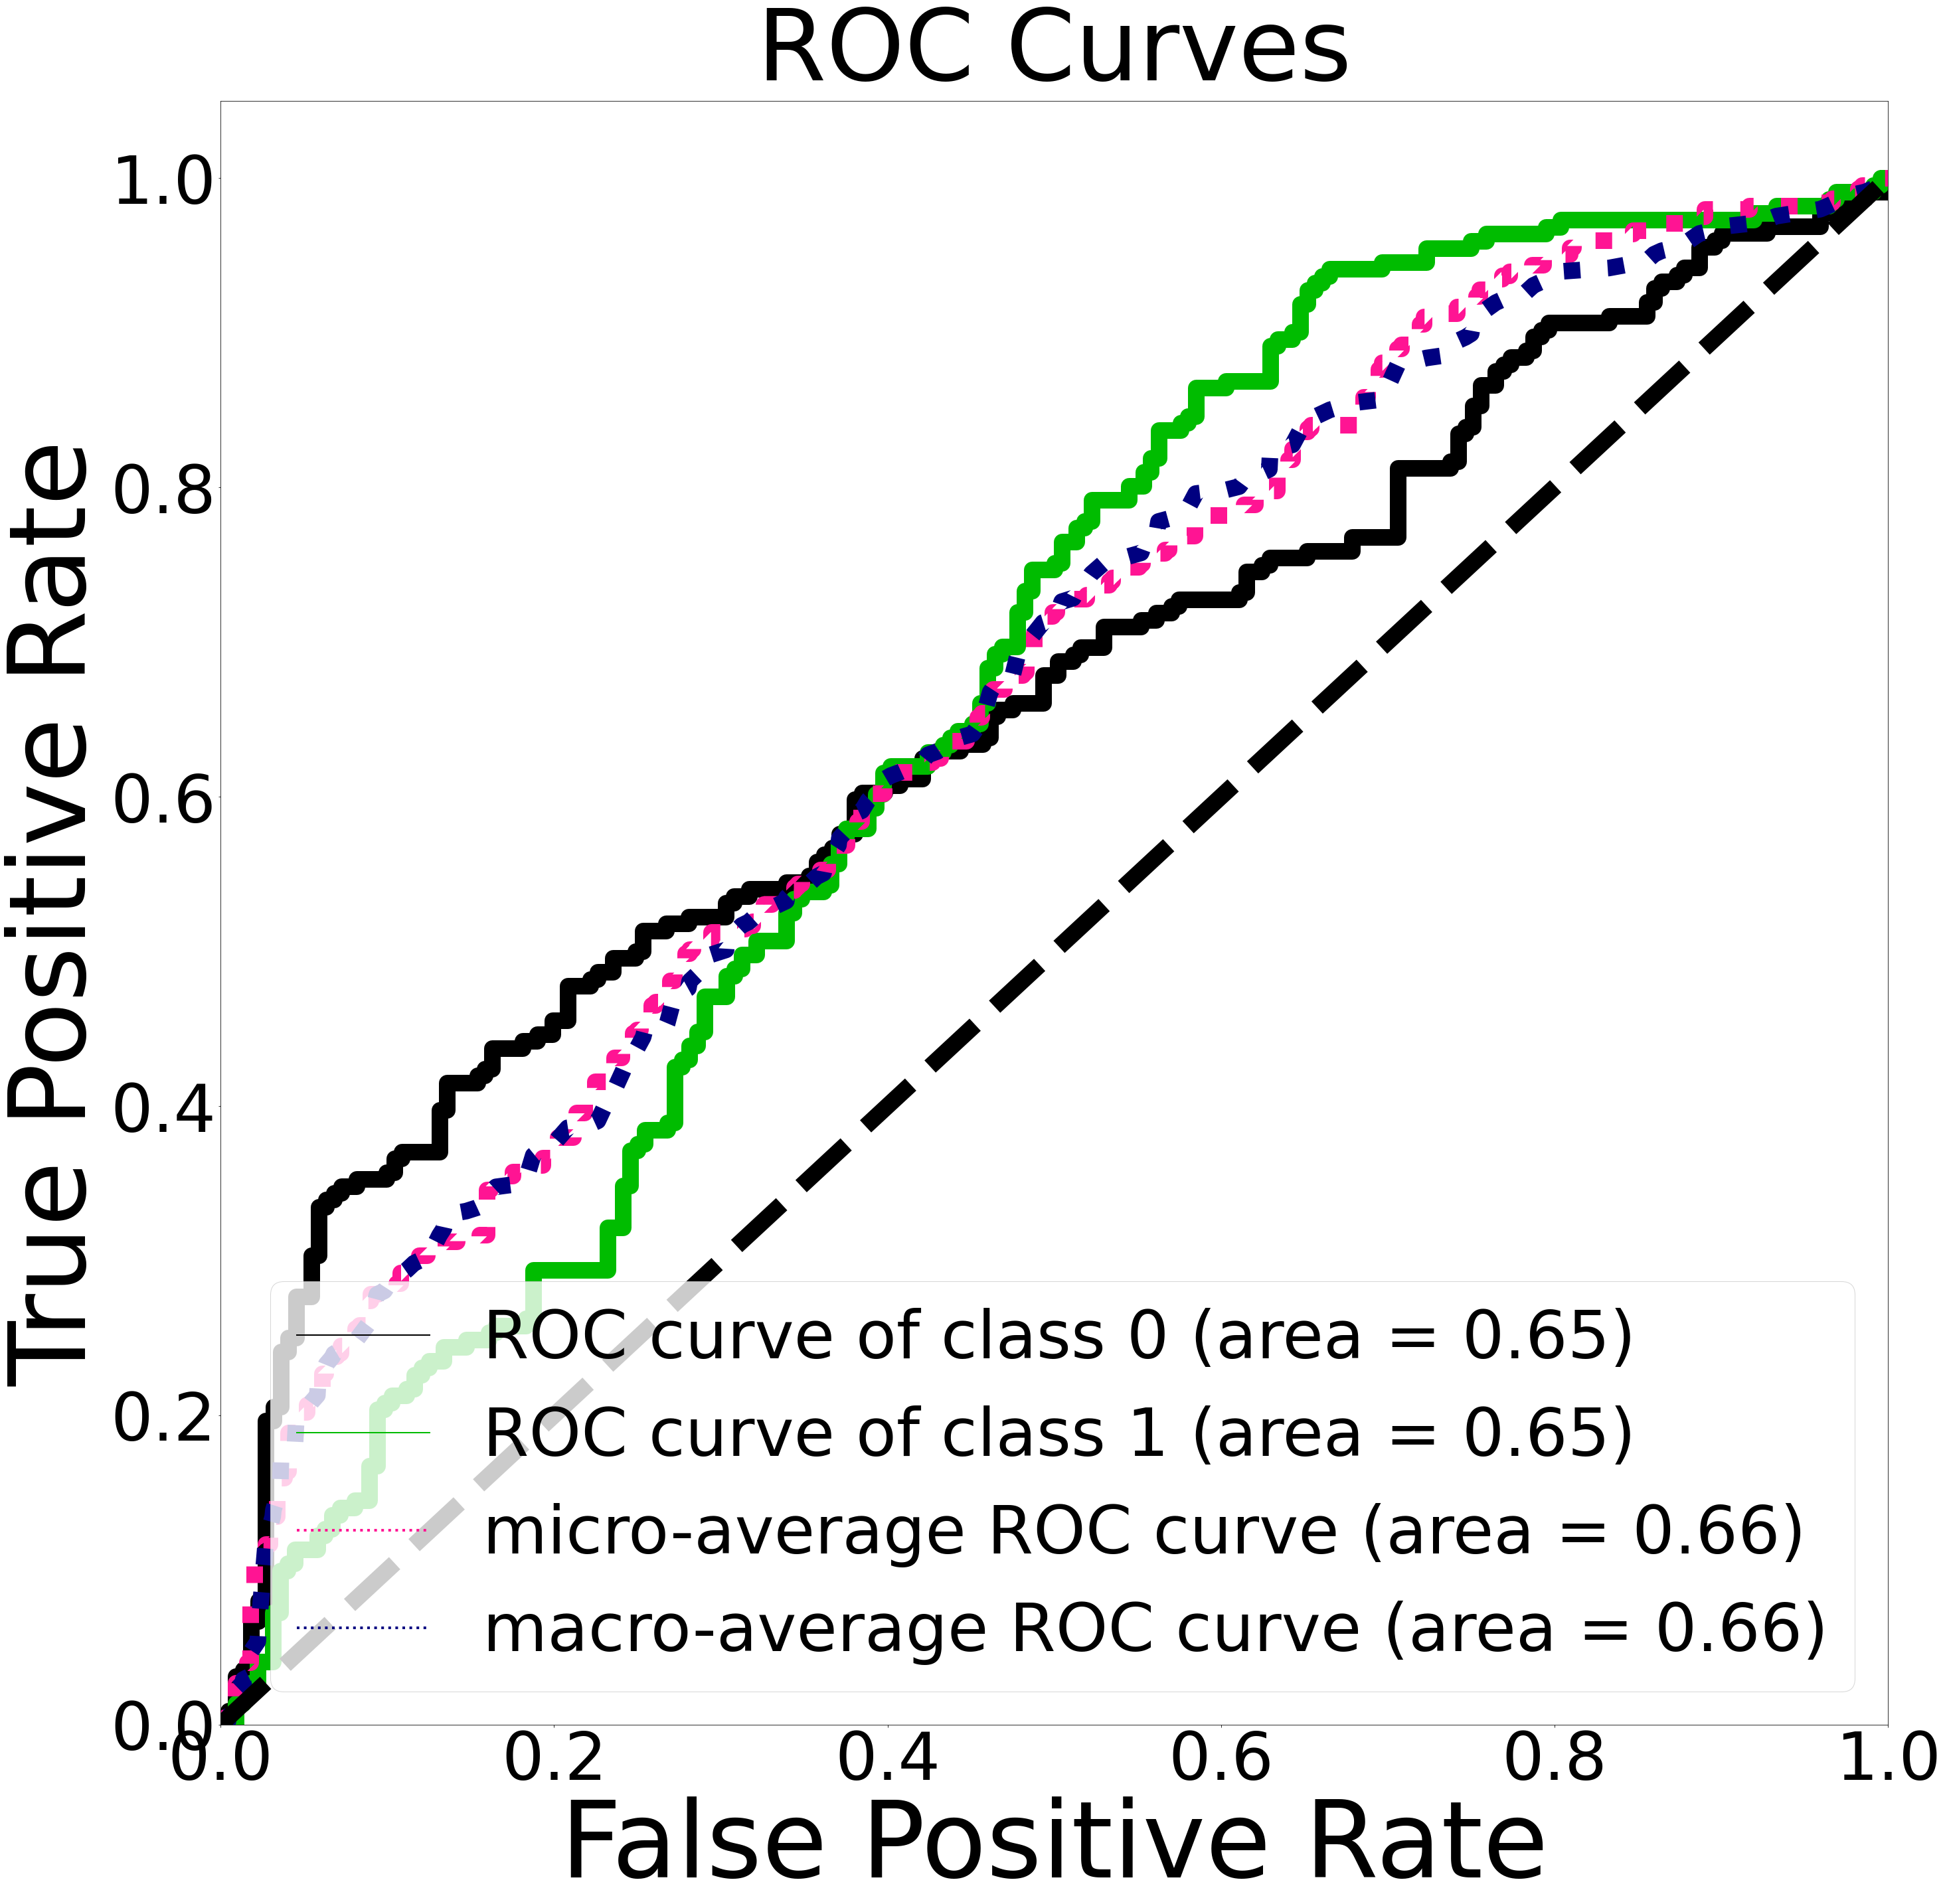

Average precision-recall score Random forest: 0.56


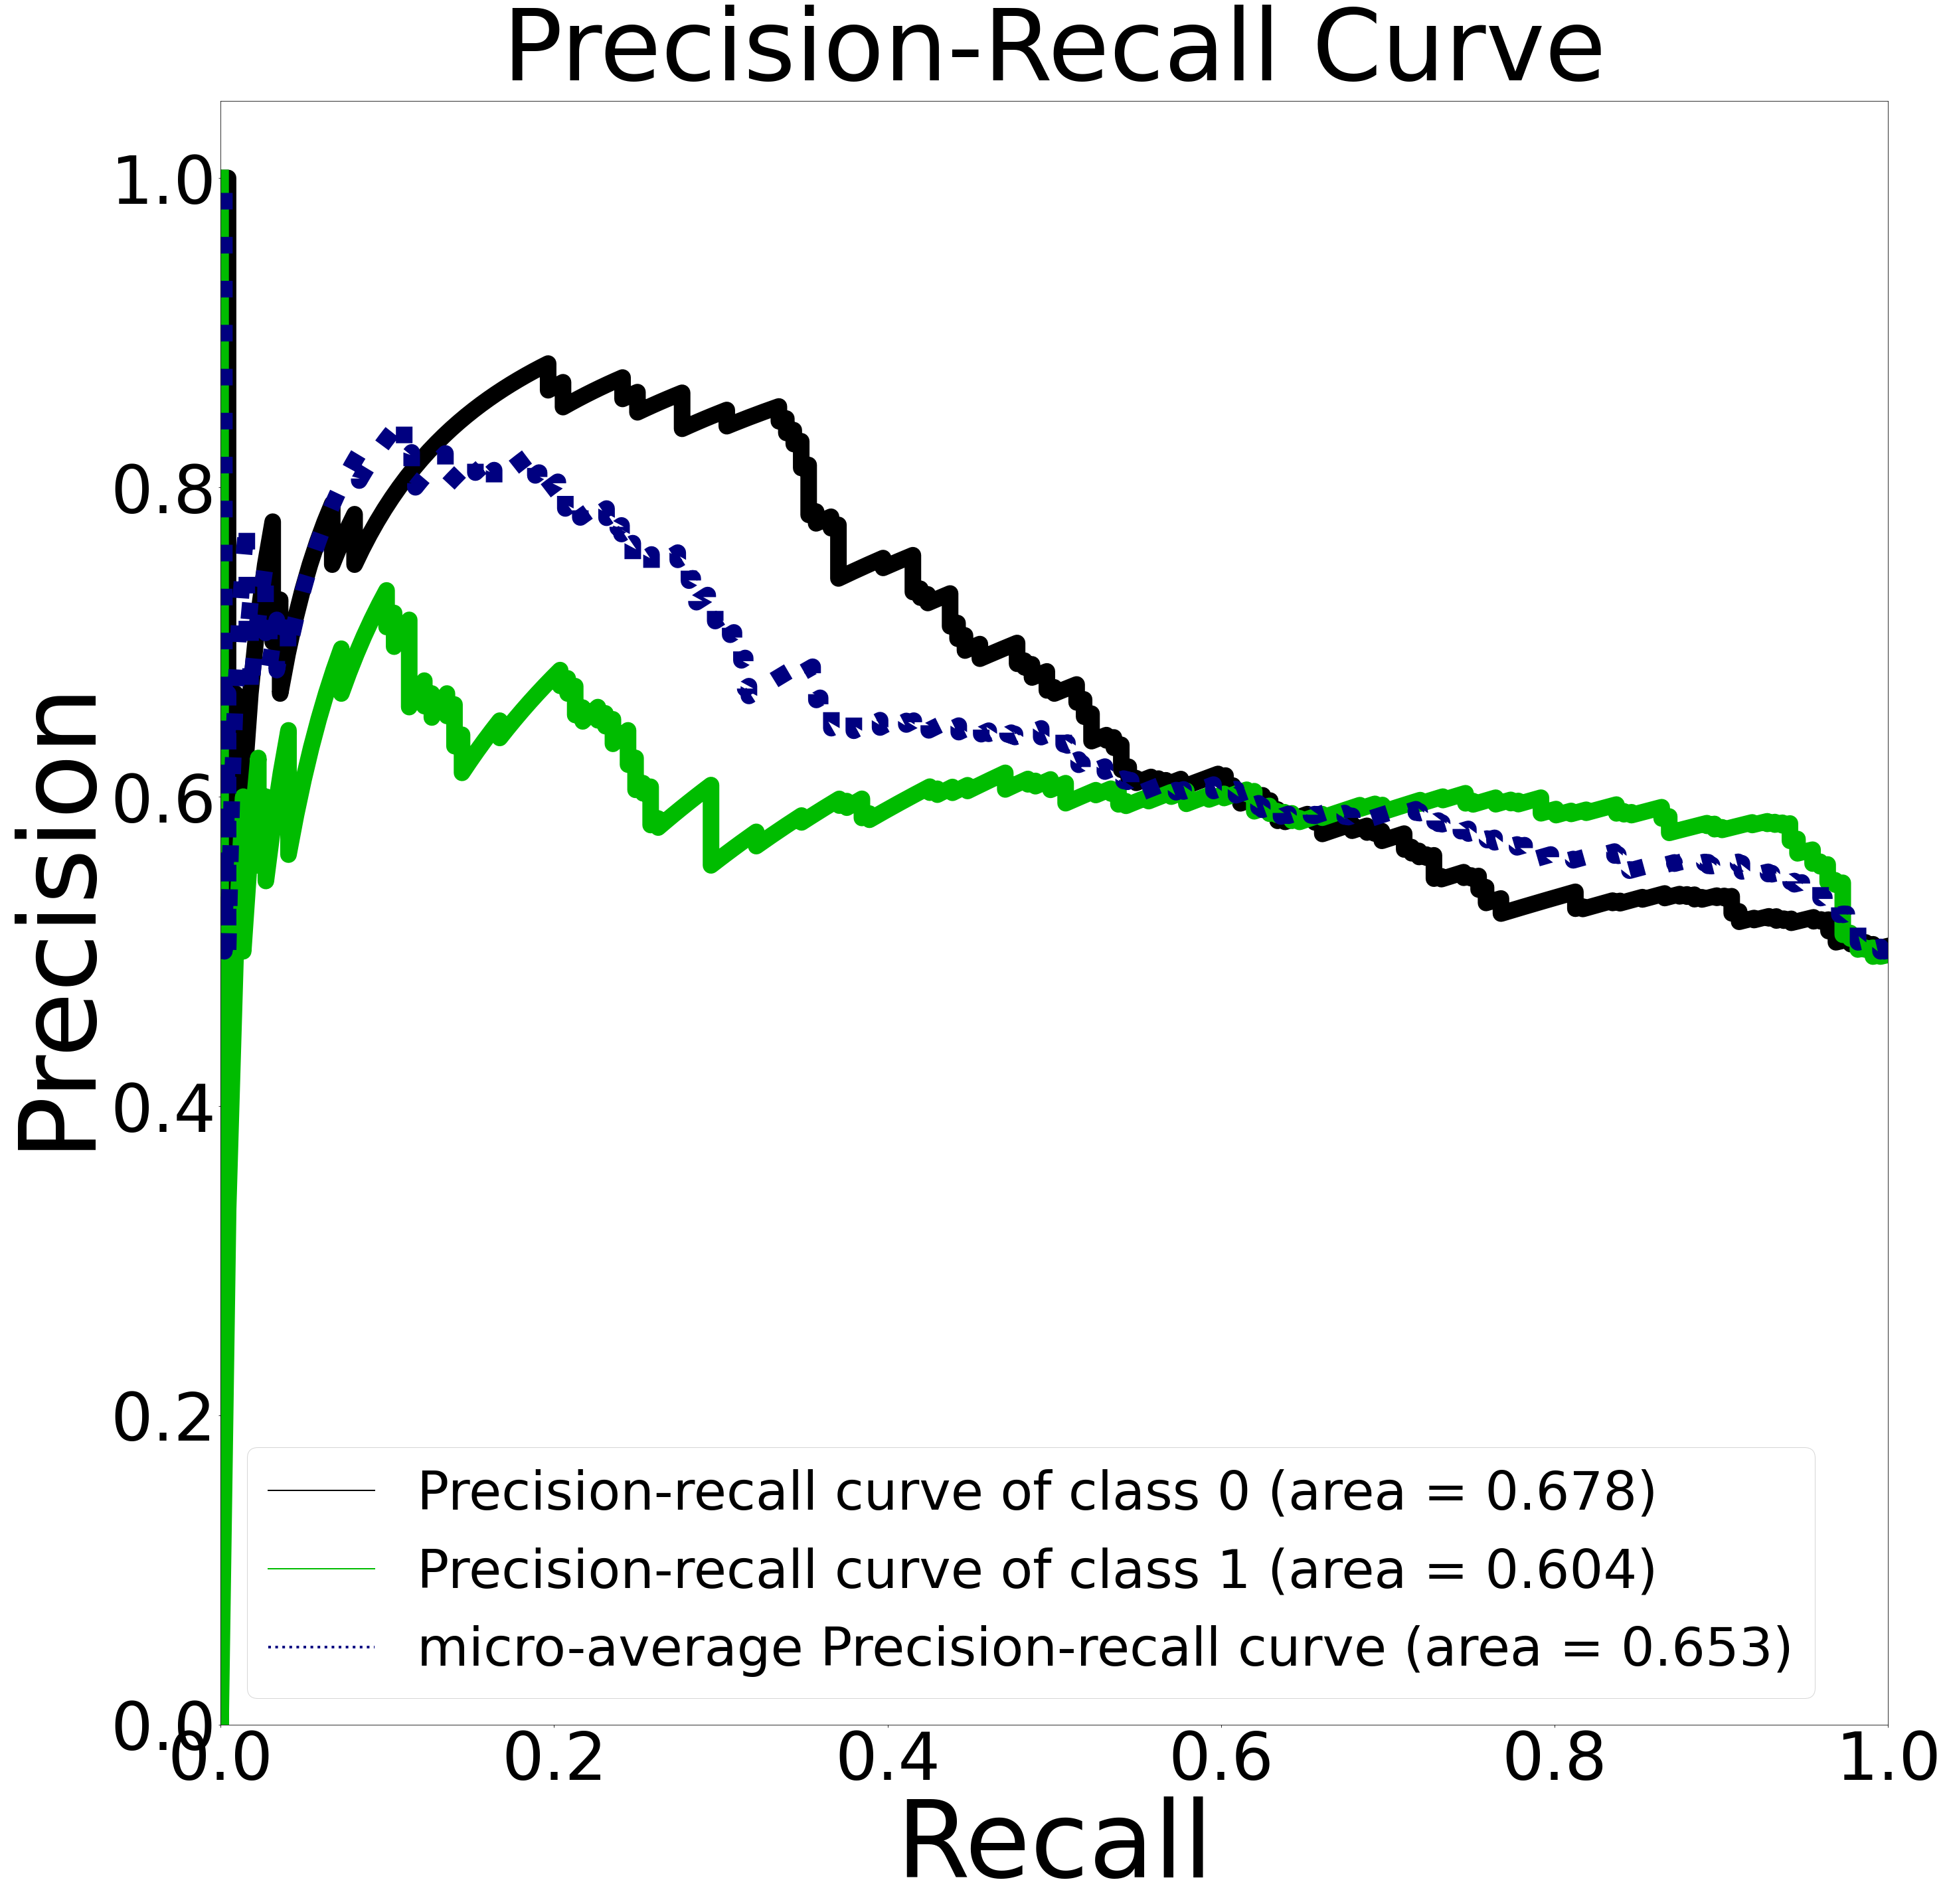

In [16]:
#Neural Network Classifier Best learning rate
neuro = MLPClassifier(learning_rate='constant',max_iter=1600)
neuro.fit(X_train, y_train)
y_neuro = 0
neuropredict = neuro.predict(X_val)
plot_graphs(neuro,X_val,y_val, neuropredict)